# Hands-on lattice calculations for the AUTH 2024 Accelerator Phyiscs course
*T. Prebibaj, F. Asvesta, Y. Papaphilippou*

---

# Part III: Tracking multiple particles in a beamline

Exercises to track multiple particles in beamlines.

---

In [71]:
# Import custom tracking functions and useful libraries
from tracking_library import *
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Exercise 11: evolution of beam along a beamline

Define an ensemble of 10000 particles following a Gaussian distributions in $x$ and $x'$ centered at $(x_0,x'_0) = (0,0)$ (mm,mrad) and $\sigma_{x_0}=1$ mm and $\sigma_{x'_0}=1$ mrad.

- Using the 100 FODO cells of $L=1$ m and $f=2.5$ m, transport the beam of the previous exercise. Plot the trajectory of a single particle and the beam centroid along the beam line.

- Plot the standard deviation (i.e. beam size) of the x coordinates along the beam line. 
    
    **Hint:** Remember that in the output of our `transportParticles` function the key `'x'` contains a 2D array with N rows (the index of the position along the beam line) and M columns (the index of a given particle). Moreover, you can compute the standard deviation of **each raw** of a NxM 2D array as `np.std(N_times_M_array,1)`. 

In [72]:
# code here your solution...

# Initializing the beam
N = 1000
X_0 = np.array([np.random.normal(0,1,N),
                np.random.normal(0,1,N)])
x0 = 0
xp0 = 0
sigx = 1e-3
sigxp = 0.5e-3
X_0[0,:] = sigx*X_0[0,:]+x0
X_0[1,:] = sigxp*X_0[1,:]+xp0

# Defining the beam line
f = 2.5
L = 1
FODO = D(L) + Q(f) + D(L) + Q(-f) # here we start at the beggining of the first drift (doesn't really matter...)
beamline = FODO*100

# Track
transported_particles = transportParticles(X_0, beamline)

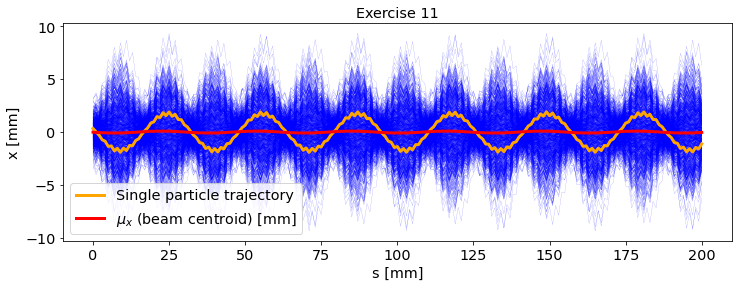

In [73]:
# code here your solution..

plt.figure(figsize=(12, 4))
plt.plot(transported_particles['s'], transported_particles['x']*1e3, c='blue', linewidth=0.1)

plt.plot(transported_particles['s'], transported_particles['x'][:,0]*1e3, linewidth=3, color='orange', label='Single particle trajectory')

plt.plot(transported_particles['s'], np.mean(transported_particles['x']*1e3,1), c='red', linewidth=3, label=r'$\mu_{x}$ (beam centroid) [mm]')

plt.xlabel('s [mm]')
plt.ylabel('x [mm]')
plt.legend()
plt.title('Exercise 11')
plt.show()

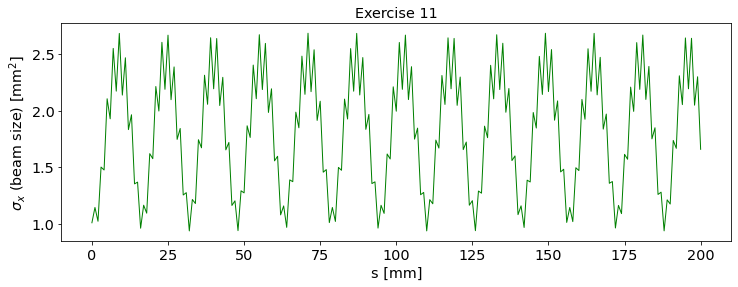

In [74]:
# code here your solution..

plt.figure(figsize=(12, 4))
plt.plot(transported_particles['s'], np.std(transported_particles['x']*1e3,1), c='green', linewidth=1)
plt.xlabel('s [mm]')
plt.ylabel('$\sigma_{x}$ (beam size) [mm$^2$]')
plt.title('Exercise 11')
plt.show()

> We notice that:
>    - Individual particles perform betatron oscillations. 
>    - On average, the beam centroid stays at zero (on average beam is "on-axis")
>    - The beam size modulates 

### Exercise 12: beam with an offset

Repeat the same exercise as in the previous one, but now with an offset in the beam. The offset should be 1 mm in the x direction.

In [75]:
# code here your solution...

# Initializing the beam
N = 1000
X_0 = np.array([np.random.normal(0,1,N),
                np.random.normal(0,1,N)])
x0 = 1e-3
xp0 = 0
sigx = 1e-3
sigxp = 0.5e-3
X_0[0,:] = sigx*X_0[0,:]+x0
X_0[1,:] = sigxp*X_0[1,:]+xp0

# Defining the beam line
f = 2.5
L = 1
FODO = D(L) + Q(f) + D(L) + Q(-f) # here we start at the beggining of the first drift (doesn't really matter...)
beamline = FODO*100

# Track
transported_particles = transportParticles(X_0, beamline)

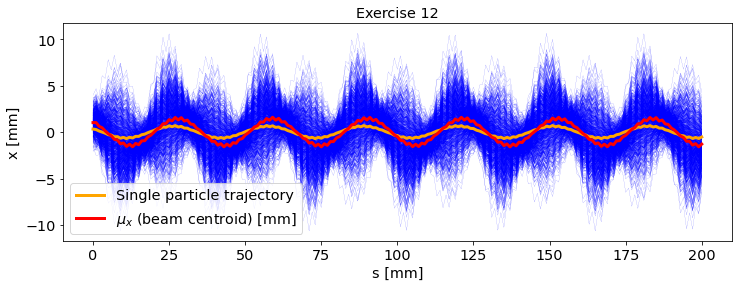

In [77]:
# code here your solution..

plt.figure(figsize=(12, 4))
plt.plot(transported_particles['s'], transported_particles['x']*1e3, c='blue', linewidth=0.1)

plt.plot(transported_particles['s'], transported_particles['x'][:,0]*1e3, linewidth=3, color='orange', label='Single particle trajectory')

plt.plot(transported_particles['s'], np.mean(transported_particles['x']*1e3,1), c='red', linewidth=3, label=r'$\mu_{x}$ (beam centroid) [mm]')

plt.xlabel('s [mm]')
plt.ylabel('x [mm]')
plt.title('Exercise 12')
plt.legend()
plt.show()

> We notice that:
>    - The beam centroid is also doing betatron oscillations. 
>    - It can be show that the average position of a beam along a beam line is the same as the the trajectory of single particle particle that starts in the center of the initial particle distribution.

## Beam emittance and phase space

- One can easily demonstrate that the same matrix ($M$) used for tracking the coordinates ($(x_i, x'_i)$) of each single particle ($i$) from an initial point ($X_0$) to a final point ($X_s$) in a beamline:

    \begin{equation}
    X_s =  M\, X_0
    \end{equation}

  can also be used to track the **average trajectory** ($\langle X \rangle$) as well as the **covariance or sigma matrix** of the given particle coordinates distribution:

    \begin{equation}
    \langle X_s \rangle = 
    \left[
    \begin{array}{c}
    \langle x_i \rangle\\
    \langle x'_i \rangle
    \end{array}
    \right]_s 
    = M\, \langle X_0 \rangle
    \end{equation}

    \begin{equation}
    \Sigma_s := \left[
    \begin{array}{c}
    \langle x_i^2 \rangle \quad \langle x_i x'_i \rangle\\
    \langle x'_i x_i \rangle \quad \langle x_i^{'2} \rangle
    \end{array}
    \right]_s = \left[
    \begin{array}{c}
    \sigma_{x}^2\quad \sigma_{x}\sigma_{x'}\\
    \sigma_{x}\sigma_{x'}\quad \sigma_{x'}^2
    \end{array}
    \right]_s
    = M\, \Sigma_0\, M^T\, .
    \end{equation}

    We can therefore track the **average trajectory** and **covariance** of a beam simply starting from its initial average coordinates and covariance matrix in phase space.


- The sigma/covariance matrix is usually parametrized as:

    \begin{equation}
    \left[
    \begin{array}{c}
    \sigma_{x}^2\quad \sigma_{x}\sigma_{x'}\\
    \sigma_{x}\sigma_{x'}\quad \sigma_{x'}^2
    \end{array}
    \right] =
        \epsilon
        \left[ 
        \begin{array}{cc}
            \beta   & -\alpha\\
            -\alpha & \gamma
        \end{array}
        \right] 
    \end{equation}

    where $\beta$, $\alpha$, $\gamma$ and $\epsilon$ are parameters such that $\epsilon = \sqrt{\det(\Sigma)}$ and $\beta \gamma - \alpha^2 = 1$. **This seems to be an arbitrary choice!** but it will acquire more special meaning later.

- We recall that $M$ is a real **symplectic** transformation, and its determinant is $\det(M) = +1$, therefore:

    \begin{equation}
    \epsilon_s^2 = \det(\Sigma_s) = \det( M\, \Sigma_0\, M^T ) = \det(M) \det(\Sigma_0) \det(M^T) = \det(\Sigma_0) = \epsilon_0^2
    \end{equation}

    which means that the quantity $\epsilon$ (the beam **statistical emittance**) is **preserved** along a beamline.

### Exercise 13: preservation of the beam emittance

- Calculate the sigma matrix of the previous example (at all s-positions of the beamline) and plot the emittance along the s-position. 
- Calculate the $\alpha$, $\beta$ and $\gamma$ parameters from the sigma matrix (Twiss parameters). Plot them and verify that $\beta\gamma-\alpha^2=1$.

In [78]:
# code here your solution..

sigmas = [] 
for i in range(len(transported_particles['s'])): # for every s-location of our lattice
    x_of_all_particles_at_s = transported_particles['x'][i,:]*1e3
    xp_of_all_particles_at_s = transported_particles['xp'][i,:]*1e3
    sigmas.append(np.cov(x_of_all_particles_at_s, xp_of_all_particles_at_s))
sigmas = np.array(sigmas)

# compute the emittance as sqrt of the determinant of all sigma matrices along 
# the beamline
emittance = np.sqrt(np.linalg.det(sigmas))
beamsize = np.sqrt(sigmas[:,0,0]) # is the same as np.std(transported_particles['x'],1)

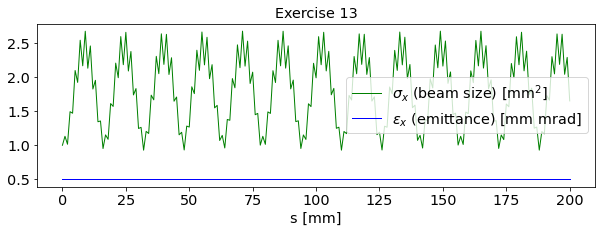

In [79]:
plt.figure(figsize=(10, 3))
plt.plot(transported_particles['s'], beamsize, c='green', linewidth=1, label=r'$\sigma_{x}$ (beam size) [mm$^2$]')
plt.plot(transported_particles['s'], emittance, c='blue', linewidth=1, label=r'$\epsilon_x$ (emittance) [mm mrad]')
plt.xlabel('s [mm]')
plt.legend()
plt.title('Exercise 13')
plt.show()

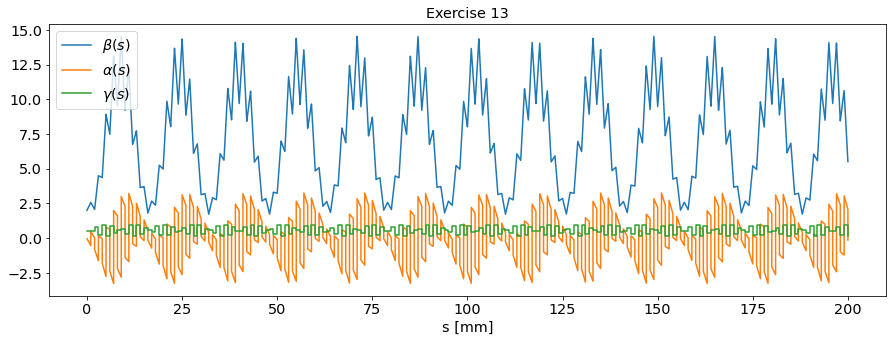

In [80]:
beta = beamsize**2/emittance
alpha = -sigmas[:,0,1]/emittance
gamma = sigmas[:,1,1]/emittance
plt.plot(transported_particles['s'], beta, label=r'$\beta(s)$')
plt.plot(transported_particles['s'], alpha, label=r'$\alpha(s)$')
plt.plot(transported_particles['s'], gamma, label=r'$\gamma(s)$')
plt.xlabel('s [mm]')
plt.legend()
plt.title('Exercise 13')
plt.show()

assert (beta*gamma - alpha**2).all()==1

> Note: beta function affects the size of the beam, alpha function affects the tilt of the beam, and gamma function affects the divergence of the beam.

By changing the properties of our beamline, i.e. the positioning and strength of the quadrupoles and the length of the drifts, the Twiss parameters change and so do the size of the beam, the size and frequency of oscillations, etc. The emittance is an invariant. 

### Exercise 14: emittance and phase space area


- On the distribution of Exercise 11, plot the phase space at two different s-locations of your choise. What do you observe?

   **Hint:** One can use the `seaborn` package to nicely see a 2D distribution, as Exercise 2. 

- Consider 3 particles (e.g. the first 3 of your ensample) such that they define a triangle of surface A. Verify that the area of this triangle is the same between the two s-locations

    **Hint:** the area of a triangle in phase space can be computed using linear algebra:
    ```
    from numpy.linalg import norm
    def area(a, b, c) :
        '''a,b,c are the phase-space coordinates of three particles'''
        return 0.5 * norm( np.cross( b-a, c-a ) )
    ```

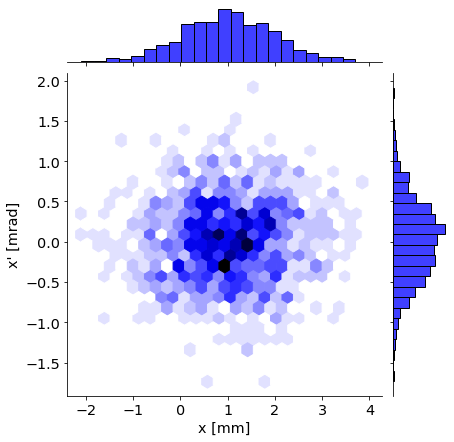

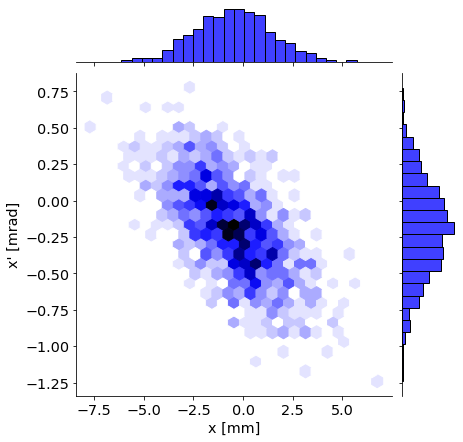

In [99]:
# code here your solution...

# particle distribution at s=0
X_0 = np.array([transported_particles['x'][0,:],
                transported_particles['xp'][0,:]])
g = sns.jointplot(x=X_0[0,:]*1e3, y=X_0[1,:]*1e3, kind="hex", color="b")
g.set_axis_labels("x [mm]", "x' [mrad]")

# particle distribution at s=100
index = np.where(transported_particles['s']==100)[0][0]
X_1 = np.array([transported_particles['x'][index,:],
                transported_particles['xp'][index,:]])
g = sns.jointplot(x=X_1[0,:]*1e3, y=X_1[1,:]*1e3, kind="hex", color="b")
g.set_axis_labels("x [mm]", "x' [mrad]")

> We note that:
>    - The particles form ellipses in the phasespace. The ellipse at $s=100$ m is tilted.
>    - The orientation of the ellipses changes along s and it depends on the Twiss parameters

In [100]:
# this is the formula of the area of a triangle
from numpy.linalg import norm
def area(a, b, c) :
    '''a,b,c are the phase-space coordinates of three particles'''
    return 0.5 * norm( np.cross( b-a, c-a ) )

In [101]:
# code here your solution...
# we take the first three particles in the beam (arbitrary choise)
print(f"Before transport {area(X_0[:,0]*1e3,X_0[:,1]*1e3,X_0[:,2]*1e3)}")
print(f"After transport {area(X_1[:,0]*1e3,X_1[:,1]*1e3,X_1[:,2]*1e3)}")

Before transport 0.11830644307455809
After transport 0.11830644307455772


Text(0.5, 1.0, 'Exercise 14')

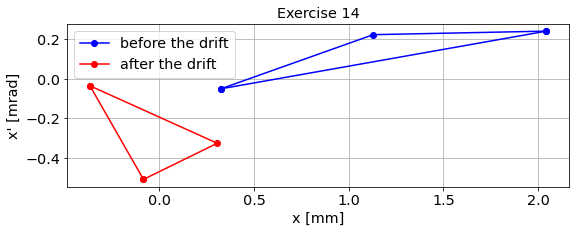

In [103]:
# Visualizing this:

plt.figure(figsize=(9,3))

#first triangle
plt.plot(X_0[:,:3][0]*1e3,X_0[:,:3][1]*1e3,'o-b')
plt.plot(X_0[:,[2,0]][0]*1e3,X_0[:,[2,0]][1]*1e3,'o-b', label='before the drift')

#second triangle
plt.plot(X_1[:,:3][0]*1e3,X_1[:,:3][1]*1e3,'o-r')
plt.plot(X_1[:,[2,0]][0]*1e3,X_1[:,[2,0]][1]*1e3,'o-r',label='after the drift')

plt.legend()
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")
plt.grid(True)
plt.title('Exercise 14')

> Note: the area of the phase space is preserved. The beam emittance is equal to the area of the phase space occupied by the beam over $2\pi$. 